<a href="https://colab.research.google.com/github/shivam9421/machine-learning/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing dependencies

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
sp500=yf.Ticker("^GSPC")

In [3]:
sp500=sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,0.0,0.0
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,0.0,0.0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,0.0,0.0


#Cleaning and visualizing our stock market data


<Axes: xlabel='Date'>

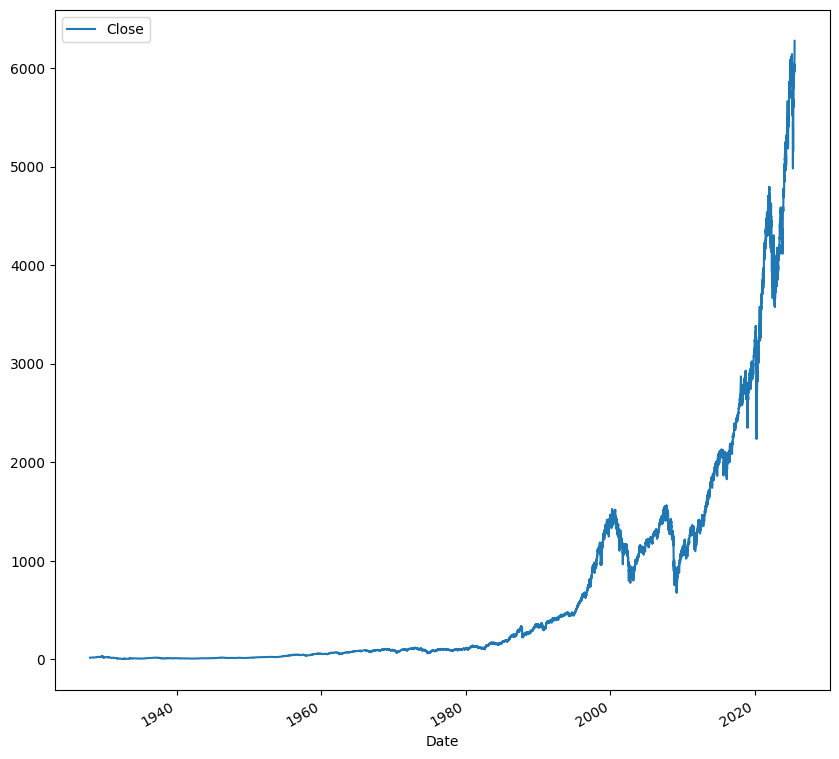

In [5]:
sp500.plot.line(y="Close",use_index=True,figsize=(10,10))

In [6]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [7]:
sp500.drop(["Dividends","Stock Splits"],axis=1,inplace=True)

#setting of our target for machine learning

In [8]:
 sp500['Tomorrow']=sp500['Close'].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,6204.950195
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,6198.009766
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,6227.419922


In [10]:
sp500["Target"]=(sp500["Tomorrow"]>sp500['Close']).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,6204.950195,1
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,6198.009766,0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,6227.419922,1


In [12]:
sp500=sp500.loc["2000-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,6204.950195,1
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,6198.009766,0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,6227.419922,1


#Training initial machine learning models

In [14]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [15]:
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

In [16]:
predictors=["Close","Volume",'Open',"High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
preds=model.predict(test[predictors])
print(preds)

[0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [18]:
preds=pd.Series(preds,index=test.index)

In [19]:
precision_score(test["Target"],preds)

0.5714285714285714

In [20]:
combined=pd.concat([test["Target"],preds],axis=1)

#Building backtesting system

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,6204.950195,1
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,6198.009766,0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,6227.419922,1


In [22]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined

In [23]:
def backtest(data,model,predictors,start=2500,step=250):
  all_predictions=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predictions=predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [24]:
predictions=backtest(sp500,model,predictors)

In [25]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,2043
1,1871


In [26]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5237840726884019

Add addtional predictors to our model

In [28]:
horizons=[2,5,60,250,1000]
new_predictors=[]
for horizon in horizons:
  rolling_averages=sp500.rolling(horizon).mean()

  ratio_column=f"Close_Ratio_{horizon}"
  sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]

  trend_column=f"Trend_{horizon}"
  sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors+=[ratio_column,trend_column]

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1,0.980453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1,1.000960,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1,1.000478,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1,1.013364,1.014881,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,6204.950195,1,1.002603,1.011196,1.078109,1.070847,1.302530,2.0,4.0,36.0,143.0,529.0
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,6198.009766,0,1.002576,1.010467,1.081995,1.075822,1.308743,2.0,4.0,36.0,144.0,530.0
2025-07-01 00:00:00-04:00,6187.250000,6210.779785,6177.970215,6198.009766,6275310000,6227.419922,1,0.999440,1.005870,1.078274,1.074080,1.306772,1.0,3.0,36.0,143.0,529.0


In [30]:
sp500=sp500.dropna()

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.002176,1.039354,1.137825,0.957328,1.0,3.0,34.0,135.0,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,1.010755,1.050761,1.150837,0.969445,2.0,4.0,34.0,135.0,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,1.007835,1.049591,1.150046,0.969833,2.0,4.0,34.0,135.0,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,1.006997,1.050463,1.151439,0.972073,2.0,4.0,34.0,136.0,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.001263,1.046073,1.147024,0.969348,1.0,4.0,33.0,135.0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-26 00:00:00-04:00,6112.089844,6146.520020,6107.270020,6141.020020,5308140000,6173.069824,1,1.003994,1.012756,1.074200,1.065798,1.296266,1.0,3.0,36.0,143.0,529.0
2025-06-27 00:00:00-04:00,6150.700195,6187.680176,6132.350098,6173.069824,7889350000,6204.950195,1,1.002603,1.011196,1.078109,1.070847,1.302530,2.0,4.0,36.0,143.0,529.0
2025-06-30 00:00:00-04:00,6193.359863,6215.080078,6174.970215,6204.950195,5782900000,6198.009766,0,1.002576,1.010467,1.081995,1.075822,1.308743,2.0,4.0,36.0,144.0,530.0


In [33]:
 model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [37]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]=1
  preds[preds<.6]=0
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined

In [38]:
predictions=backtest(sp500,model,new_predictors)

In [39]:
predictions['Predictions'].value_counts()

,count
Predictions,
0.0,2453
1.0,460


In [40]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5347826086956522